In [77]:
import wradlib as wrl
import pyart as pyart
import matplotlib.pyplot as plt
import os
from glob import glob
import netCDF4
import cartopy.crs as ccrs
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [39]:
fpath = '/Volumes/Neely/PestDAR/Oman_Raw_Netcdf_Radar_Data/sur/20200401/salalah-oman-sband-PestDAR-20200401-000403.nc'
radar=pyart.io.read(fpath)

In [22]:
instrument_name = (radar.metadata['instrument_name'])[0:7]
instrument_name

'Salalah'

In [48]:
radar.fixed_angle['data']

masked_array(data=[ 0.5,  1. ,  1.5,  2. ,  4. ,  6. , 10. , 15. ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [23]:
print(radar.longitude)
print(radar.latitude)
instrument_name = (radar.metadata['instrument_name'])[0:7]
time_start = netCDF4.num2date(radar.time['data'][0], radar.time['units'])
time_text = ' ' + time_start.strftime('%Y-%m-%d %H:%M:%SZ')
print(time_text)

{'long_name': 'longitude', 'units': 'degrees_east', '_FillValue': -9999.0, 'data': masked_array(data=[53.93277],
             mask=False,
       fill_value=1e+20)}
{'long_name': 'latitude', 'units': 'degrees_north', '_FillValue': -9999.0, 'data': masked_array(data=[17.12568],
             mask=False,
       fill_value=1e+20)}
 2020-04-01 00:04:03Z


In [24]:
fields=radar.fields.keys()
fields

dict_keys(['KDP', 'PhiDP', 'RhoHV', 'SNR', 'SQI', 'V', 'W', 'ZDR', 'dBZ', 'uPhiDP'])

In [26]:
radar.fields['dBZ']['units']

'dBZ'

In [ ]:
radar.range

In [ ]:
radar.fields['dBZ']

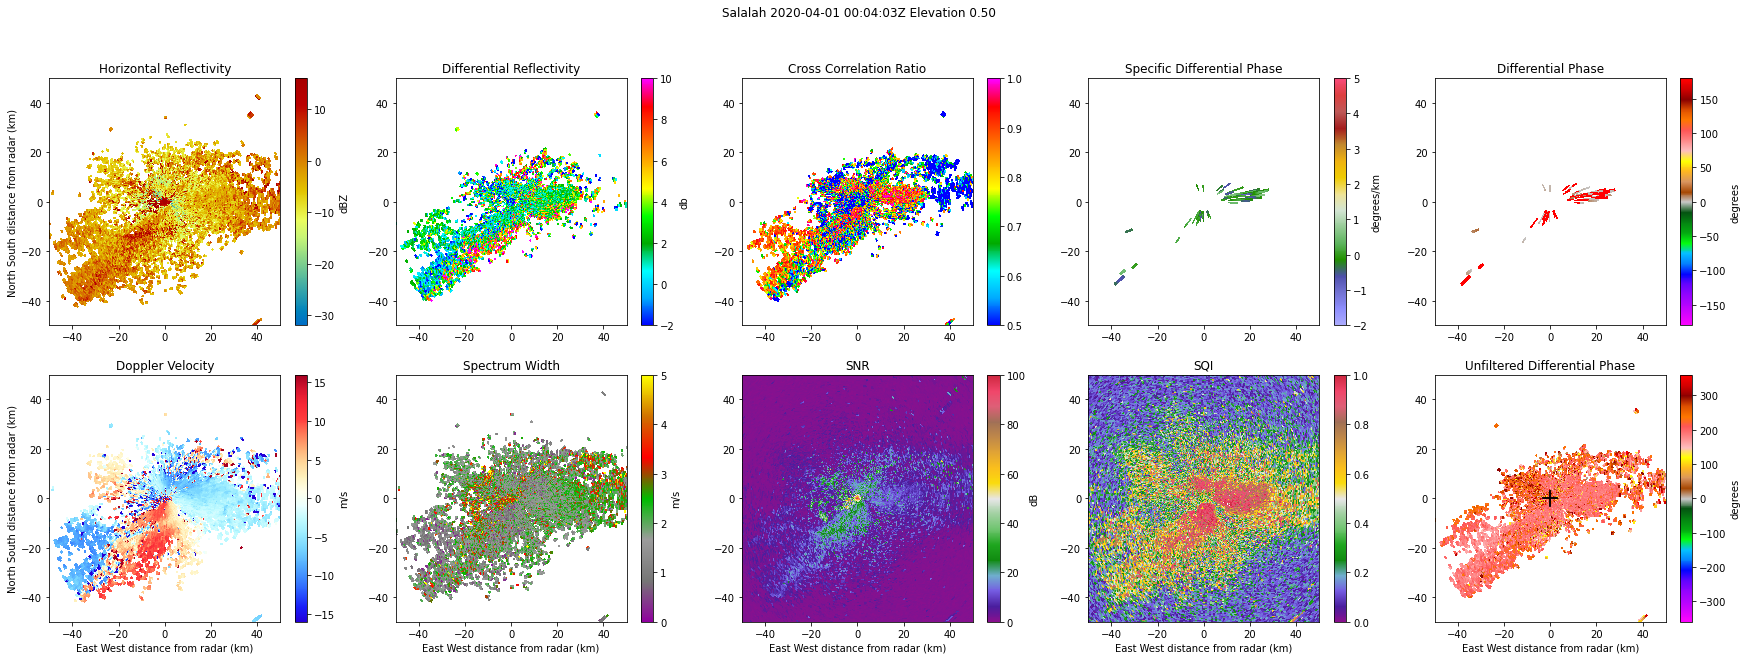

In [46]:
#Read Files and Setup Plotting
fpath = fpath
radar=pyart.io.read(fpath)
display = pyart.graph.RadarDisplay(radar)


#Plotting Options
ele = 0 #Elevation
R = 50#  #Min and Mac Range from Radar in km


# set the figure title and show
instrument_name = (radar.metadata['instrument_name'])[0:7]
time_start = netCDF4.num2date(radar.time['data'][0], radar.time['units'])
time_text = ' ' + time_start.strftime('%Y-%m-%d %H:%M:%SZ')
elevation = radar.fixed_angle['data'][ele]
title = instrument_name + time_text + ' Elevation %.2f' % (elevation)
title


#Figure Options
width=30 #in inches
height=10 #in inches

fig = plt.figure(figsize=(width, height))
nrows=2
ncols=5

ax1 = fig.add_subplot(nrows,ncols,1)
display.plot('dBZ',ele,ax=ax1, vmin=-32, vmax=16., title='Horizontal Reflectivity', colorbar_label=radar.fields['dBZ']['units'],
             axislabels=('', 'North South distance from radar (km)'))
display.set_limits((-R, R), (-R, R), ax=ax1)

ax2 = fig.add_subplot(nrows,ncols,2)
display.plot('ZDR', ele,ax=ax2, vmin=-2, vmax=10., title='Differential Reflectivity', colorbar_label=radar.fields['ZDR']['units'],
             axislabels=('', ''), cmap = 'pyart_RefDiff')
display.set_limits((-R, R), (-R, R), ax=ax2)


ax3 = fig.add_subplot(nrows,ncols,3)
display.plot('RhoHV', ele,ax=ax3, vmin=.5, vmax=1., title='Cross Correlation Ratio', colorbar_label=radar.fields['RhoHV']['units'],
             axislabels=('', ''), cmap = 'pyart_RefDiff')
display.set_limits((-R, R), (-R, R), ax=ax3)


ax4 = fig.add_subplot(nrows,ncols,4)
display.plot('KDP', ele,ax=ax4, vmin=-2, vmax=5., title='Specific Differential Phase', colorbar_label=radar.fields['KDP']['units'],
             axislabels=('', ''), cmap = 'pyart_Theodore16')
display.set_limits((-R, R), (-R, R), ax=ax4)


ax5 = fig.add_subplot(nrows,ncols,5)
display.plot('PhiDP', ele,ax=ax5, vmin=-180, vmax=180., title='Differential Phase', colorbar_label=radar.fields['PhiDP']['units'],
             axislabels=('', ''), cmap = 'pyart_Wild25')
display.set_limits((-R, R), (-R, R), ax=ax5)


ax6 = fig.add_subplot(nrows,ncols,6)
display.plot('V',ele,ax=ax6, vmin=-16, vmax=16., title='Doppler Velocity', colorbar_label=radar.fields['V']['units'],
             axislabels=('East West distance from radar (km)', 'North South distance from radar (km)'), cmap = 'pyart_BuDRd18')
display.set_limits((-R, R), (-R, R), ax=ax6)


ax7 = fig.add_subplot(nrows,ncols,7)
display.plot('W', ele, ax=ax7, vmin=0, vmax=5., title='Spectrum Width', colorbar_label=radar.fields['W']['units'],
             axislabels=('East West distance from radar (km)', '') , cmap = 'pyart_NWS_SPW')
display.set_limits((-R, R), (-R, R), ax=ax7)


ax8 = fig.add_subplot(nrows,ncols,8)
display.plot('SNR', ele, ax=ax8, title='SNR', colorbar_label=radar.fields['SNR']['units'],
             axislabels=('East West distance from radar (km)', ''), cmap = 'pyart_Carbone17')
display.set_limits((-R, R), (-R, R), ax=ax8)


ax9 = fig.add_subplot(nrows,ncols,9)
display.plot('SQI', ele, ax=ax9, title='SQI', colorbar_label=radar.fields['SQI']['units'],
             axislabels=('East West distance from radar (km)', ''), cmap='pyart_Carbone17')
display.set_limits((-R, R), (-R, R), ax=ax9)


ax10 = fig.add_subplot(nrows,ncols,10)
display.plot('uPhiDP', ele,ax=ax10, vmin=-360, vmax= 360., title='Unfiltered Differential Phase', colorbar_label=radar.fields['uPhiDP']['units'],
             axislabels=('East West distance from radar (km)', ''),cmap='pyart_Wild25')
display.set_limits((-R, R), (-R, R), ax=ax10)

display.plot_cross_hair(3.)
plt.suptitle(title, fontsize=24)

           
           
display.plot_cross_hair(3.)
plt.suptitle(title)
plt.show()



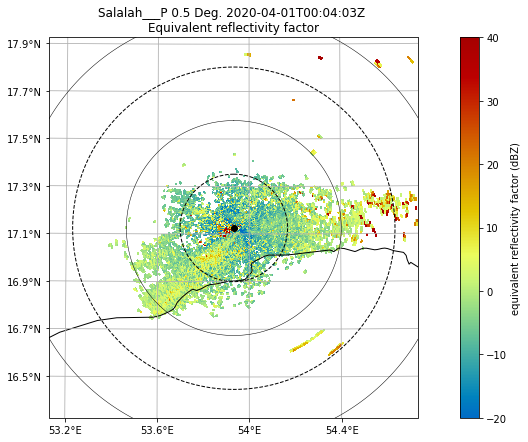

In [95]:
display = pyart.graph.RadarMapDisplay(radar)

fig = plt.figure(figsize=[15, 7])

# Setting projection and ploting the second tilt
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])
x=0.4

display.plot_ppi_map('dBZ', 0, vmin=-20, vmax=40,
                     min_lon=radar.longitude['data'][0]-2*x, max_lon=radar.longitude['data'][0]+2*x, min_lat=radar.latitude['data'][0]-2*x, max_lat=radar.latitude['data'][0]+2*x,
                     lon_lines=np.arange(52, 58, .4), resolution='10m',
                     lat_lines=np.arange(15.5, 18.5, .2), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])

# Plot range rings
display.plot_range_ring(25., line_style='k--',lw=1)
display.plot_range_ring(50., line_style='k-',lw=0.5)
display.plot_range_ring(75., line_style='k--',lw=1)
display.plot_range_ring(100., line_style='k-',lw=0.5)
display.plot_range_ring(125., line_style='k--',lw=1)
display.plot_range_ring(150., line_style='k-',lw=0.5)
# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'ko')

plt.show()

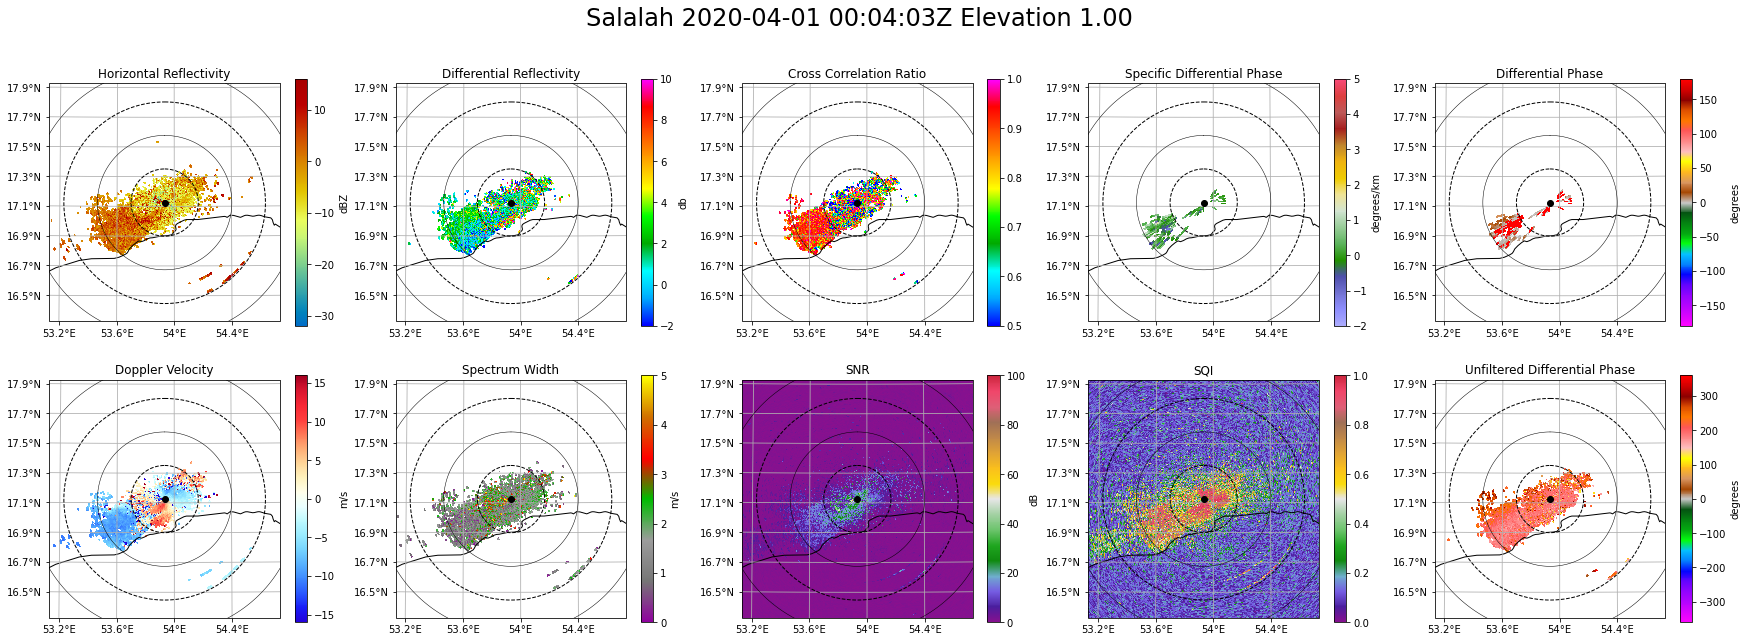

In [97]:
#Read Files and Setup Plotting
fpath = fpath
radar=pyart.io.read(fpath)
display = pyart.graph.RadarMapDisplay(radar)


#Plotting Options
ele = 1 #Elevation


# set the figure title and show
instrument_name = (radar.metadata['instrument_name'])[0:7]
time_start = netCDF4.num2date(radar.time['data'][0], radar.time['units'])
time_text = ' ' + time_start.strftime('%Y-%m-%d %H:%M:%SZ')
elevation = radar.fixed_angle['data'][ele]
title = instrument_name + time_text + ' Elevation %.2f' % (elevation)
title


#Figure Options
width=30 #in inches
height=10 #in inches

fig = plt.figure(figsize=(width, height))
nrows=2
ncols=5

# Setting projection and ploting the second tilt
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])
x=0.4


ax1 = fig.add_subplot(nrows,ncols,1,projection=projection)
display.plot_ppi_map('dBZ',ele,ax=ax1, vmin=-32, vmax=16., title='Horizontal Reflectivity', colorbar_label=radar.fields['dBZ']['units'],
                     min_lon=radar.longitude['data'][0]-2*x, max_lon=radar.longitude['data'][0]+2*x, min_lat=radar.latitude['data'][0]-2*x, 
                     max_lat=radar.latitude['data'][0]+2*x,lon_lines=np.arange(52, 58, .4), resolution='10m',lat_lines=np.arange(15.5, 18.5, .2),
                     projection=projection,fig=fig, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0])
display.plot_range_ring(25., line_style='k--',lw=1)
display.plot_range_ring(50., line_style='k-',lw=0.5)
display.plot_range_ring(75., line_style='k--',lw=1)
display.plot_range_ring(100., line_style='k-',lw=0.5)
display.plot_range_ring(125., line_style='k--',lw=1)
display.plot_range_ring(150., line_style='k-',lw=0.5)
# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'ko')


ax2 = fig.add_subplot(nrows,ncols,2,projection=projection)
display.plot_ppi_map('ZDR', ele,ax=ax2, vmin=-2, vmax=10., title='Differential Reflectivity', colorbar_label=radar.fields['ZDR']['units'],cmap = 'pyart_RefDiff',
                     min_lon=radar.longitude['data'][0]-2*x, max_lon=radar.longitude['data'][0]+2*x, min_lat=radar.latitude['data'][0]-2*x, max_lat=radar.latitude['data'][0]+2*x,
                     lon_lines=np.arange(52, 58, .4), resolution='10m',
                     lat_lines=np.arange(15.5, 18.5, .2), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])
display.plot_range_ring(25., line_style='k--',lw=1)
display.plot_range_ring(50., line_style='k-',lw=0.5)
display.plot_range_ring(75., line_style='k--',lw=1)
display.plot_range_ring(100., line_style='k-',lw=0.5)
display.plot_range_ring(125., line_style='k--',lw=1)
display.plot_range_ring(150., line_style='k-',lw=0.5)
# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'ko')


ax3 = fig.add_subplot(nrows,ncols,3,projection=projection)
display.plot_ppi_map('RhoHV', ele,ax=ax3, vmin=.5, vmax=1., title='Cross Correlation Ratio', colorbar_label=radar.fields['RhoHV']['units'], cmap = 'pyart_RefDiff',
                     min_lon=radar.longitude['data'][0]-2*x, max_lon=radar.longitude['data'][0]+2*x, min_lat=radar.latitude['data'][0]-2*x, max_lat=radar.latitude['data'][0]+2*x,
                     lon_lines=np.arange(52, 58, .4), resolution='10m',
                     lat_lines=np.arange(15.5, 18.5, .2), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])
display.plot_range_ring(25., line_style='k--',lw=1)
display.plot_range_ring(50., line_style='k-',lw=0.5)
display.plot_range_ring(75., line_style='k--',lw=1)
display.plot_range_ring(100., line_style='k-',lw=0.5)
display.plot_range_ring(125., line_style='k--',lw=1)
display.plot_range_ring(150., line_style='k-',lw=0.5)
# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'ko')


ax4 = fig.add_subplot(nrows,ncols,4,projection=projection)
display.plot_ppi_map('KDP', ele,ax=ax4, vmin=-2, vmax=5., title='Specific Differential Phase', colorbar_label=radar.fields['KDP']['units'], cmap = 'pyart_Theodore16',
                     min_lon=radar.longitude['data'][0]-2*x, max_lon=radar.longitude['data'][0]+2*x, min_lat=radar.latitude['data'][0]-2*x, max_lat=radar.latitude['data'][0]+2*x,
                     lon_lines=np.arange(52, 58, .4), resolution='10m',
                     lat_lines=np.arange(15.5, 18.5, .2), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])
display.plot_range_ring(25., line_style='k--',lw=1)
display.plot_range_ring(50., line_style='k-',lw=0.5)
display.plot_range_ring(75., line_style='k--',lw=1)
display.plot_range_ring(100., line_style='k-',lw=0.5)
display.plot_range_ring(125., line_style='k--',lw=1)
display.plot_range_ring(150., line_style='k-',lw=0.5)
# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'ko')


ax5 = fig.add_subplot(nrows,ncols,5,projection=projection)
display.plot_ppi_map('PhiDP', ele,ax=ax5, vmin=-180, vmax=180., title='Differential Phase', colorbar_label=radar.fields['PhiDP']['units'], cmap = 'pyart_Wild25',
                     min_lon=radar.longitude['data'][0]-2*x, max_lon=radar.longitude['data'][0]+2*x, min_lat=radar.latitude['data'][0]-2*x, max_lat=radar.latitude['data'][0]+2*x,
                     lon_lines=np.arange(52, 58, .4), resolution='10m',
                     lat_lines=np.arange(15.5, 18.5, .2), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])
display.plot_range_ring(25., line_style='k--',lw=1)
display.plot_range_ring(50., line_style='k-',lw=0.5)
display.plot_range_ring(75., line_style='k--',lw=1)
display.plot_range_ring(100., line_style='k-',lw=0.5)
display.plot_range_ring(125., line_style='k--',lw=1)
display.plot_range_ring(150., line_style='k-',lw=0.5)
# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'ko')


ax6 = fig.add_subplot(nrows,ncols,6,projection=projection)
display.plot_ppi_map('V',ele,ax=ax6, vmin=-16, vmax=16., title='Doppler Velocity', colorbar_label=radar.fields['V']['units'], cmap = 'pyart_BuDRd18',
                     min_lon=radar.longitude['data'][0]-2*x, max_lon=radar.longitude['data'][0]+2*x, min_lat=radar.latitude['data'][0]-2*x, max_lat=radar.latitude['data'][0]+2*x,
                     lon_lines=np.arange(52, 58, .4), resolution='10m',
                     lat_lines=np.arange(15.5, 18.5, .2), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])
display.plot_range_ring(25., line_style='k--',lw=1)
display.plot_range_ring(50., line_style='k-',lw=0.5)
display.plot_range_ring(75., line_style='k--',lw=1)
display.plot_range_ring(100., line_style='k-',lw=0.5)
display.plot_range_ring(125., line_style='k--',lw=1)
display.plot_range_ring(150., line_style='k-',lw=0.5)
# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'ko')


ax7 = fig.add_subplot(nrows,ncols,7,projection=projection)
display.plot_ppi_map('W', ele, ax=ax7, vmin=0, vmax=5., title='Spectrum Width', colorbar_label=radar.fields['W']['units'], cmap = 'pyart_NWS_SPW',
                     min_lon=radar.longitude['data'][0]-2*x, max_lon=radar.longitude['data'][0]+2*x, min_lat=radar.latitude['data'][0]-2*x, max_lat=radar.latitude['data'][0]+2*x,
                     lon_lines=np.arange(52, 58, .4), resolution='10m',
                     lat_lines=np.arange(15.5, 18.5, .2), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])
display.plot_range_ring(25., line_style='k--',lw=1)
display.plot_range_ring(50., line_style='k-',lw=0.5)
display.plot_range_ring(75., line_style='k--',lw=1)
display.plot_range_ring(100., line_style='k-',lw=0.5)
display.plot_range_ring(125., line_style='k--',lw=1)
display.plot_range_ring(150., line_style='k-',lw=0.5)
# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'ko')


ax8 = fig.add_subplot(nrows,ncols,8,projection=projection)
display.plot_ppi_map('SNR', ele, ax=ax8, title='SNR', colorbar_label=radar.fields['SNR']['units'], cmap = 'pyart_Carbone17',
                     min_lon=radar.longitude['data'][0]-2*x, max_lon=radar.longitude['data'][0]+2*x, min_lat=radar.latitude['data'][0]-2*x, max_lat=radar.latitude['data'][0]+2*x,
                     lon_lines=np.arange(52, 58, .4), resolution='10m',
                     lat_lines=np.arange(15.5, 18.5, .2), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])
display.plot_range_ring(25., line_style='k--',lw=1)
display.plot_range_ring(50., line_style='k-',lw=0.5)
display.plot_range_ring(75., line_style='k--',lw=1)
display.plot_range_ring(100., line_style='k-',lw=0.5)
display.plot_range_ring(125., line_style='k--',lw=1)
display.plot_range_ring(150., line_style='k-',lw=0.5)
# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'ko')


ax9 = fig.add_subplot(nrows,ncols,9,projection=projection)
display.plot_ppi_map('SQI', ele, ax=ax9, title='SQI', colorbar_label=radar.fields['SQI']['units'], cmap='pyart_Carbone17',
                     min_lon=radar.longitude['data'][0]-2*x, max_lon=radar.longitude['data'][0]+2*x, min_lat=radar.latitude['data'][0]-2*x, max_lat=radar.latitude['data'][0]+2*x,
                     lon_lines=np.arange(52, 58, .4), resolution='10m',
                     lat_lines=np.arange(15.5, 18.5, .2), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])
display.plot_range_ring(25., line_style='k--',lw=1)
display.plot_range_ring(50., line_style='k-',lw=0.5)
display.plot_range_ring(75., line_style='k--',lw=1)
display.plot_range_ring(100., line_style='k-',lw=0.5)
display.plot_range_ring(125., line_style='k--',lw=1)
display.plot_range_ring(150., line_style='k-',lw=0.5)
# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'ko')


ax10 = fig.add_subplot(nrows,ncols,10,projection=projection)
display.plot_ppi_map('uPhiDP', ele, vmin=-360, vmax= 360., title='Unfiltered Differential Phase', colorbar_label=radar.fields['uPhiDP']['units'],cmap='pyart_Wild25',
                     min_lon=radar.longitude['data'][0]-2*x, max_lon=radar.longitude['data'][0]+2*x, min_lat=radar.latitude['data'][0]-2*x, max_lat=radar.latitude['data'][0]+2*x,
                     lon_lines=np.arange(52, 58, .4), resolution='10m',
                     lat_lines=np.arange(15.5, 18.5, .2), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])
display.plot_range_ring(25., line_style='k--',lw=1)
display.plot_range_ring(50., line_style='k-',lw=0.5)
display.plot_range_ring(75., line_style='k--',lw=1)
display.plot_range_ring(100., line_style='k-',lw=0.5)
display.plot_range_ring(125., line_style='k--',lw=1)
display.plot_range_ring(150., line_style='k-',lw=0.5)
# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'ko')


plt.suptitle(title, fontsize=24)
plt.show()

